# Gaussian distribution to process timestamps

In Miranda et al. algorithms, the timestamps are considered similar according to the Gaussian equation. This means the lower the difference between the two timestamp, the higher the similarity score. The decrease in similarity is due to the rapid descent of the Gaussian curve.

First, we draw the Gaussian curve which is in use with a `number_of_days` equal to 3 (which acts as the standard deviation).

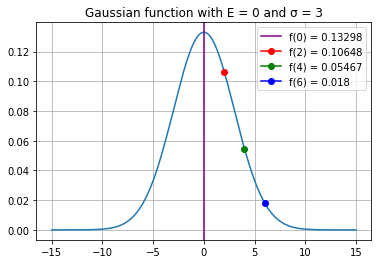

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

mean = 0
standard_deviation = 3

x_values = np.arange(-15, 15, 0.01)
y_values = scipy.stats.norm(mean, standard_deviation)

ax = plt.gca()
plt.grid(visible=True)
ax.set_title(f"Gaussian function with E = {mean} and σ = {standard_deviation}")
ax.plot(x_values, y_values.pdf(x_values))
ax.axvline(0, label=f"f(0) = {round(y_values.pdf(0), 5)}", c="purple")
ax.plot(2, y_values.pdf(2), marker="o", label=f"f(2) = {round(y_values.pdf(2), 5)}", c="red")
ax.plot(4, y_values.pdf(4), marker="o", label=f"f(4) = {round(y_values.pdf(4), 5)}", c="green")
ax.plot(6, y_values.pdf(6), marker="o", label=f"f(6) = {round(y_values.pdf(6), 5)}", c="blue")
plt.legend()

# Experiments on the corpus

We will consider three documents: one as a reference, another published sooner after the first, the last published longer after.

In [2]:
import pandas

test_corpus = pandas.read_pickle("./data/test_corpus.pickle")

In [3]:
reference, close, far = (
    test_corpus.loc["24289584"].date.timestamp(),
    test_corpus.loc["24289622"].date.timestamp(),
    test_corpus.loc["47394969"].date.timestamp(),
)

Now, we have the number of days between the `reference` article with `close` and between `reference` and `far`.

In [4]:
number_of_seconds_in_a_year = 60 * 60 * 24

In [5]:
reference_to_close = (close - reference) / number_of_seconds_in_a_year

In [6]:
reference_to_far = (far - reference) / number_of_seconds_in_a_year

In [8]:
reference_to_close, reference_to_far

(0.0006944444444444445, 298.0083333333333)

And the similarity, according to the Gaussian equations…

In [7]:
y_values.pdf(reference_to_close), y_values.pdf(reference_to_far)

(0.13298075657101197, 0.0)